# Customer Lifetime Value (CLV) Prediction
## Initial Exploration & Feature Transformation

This notebook focuses on **preparing the data** for modeling by addressing skewness, encoding categorical values, and applying transformations to make the dataset suitable for baseline models like **Linear Regression**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data= pd.read_csv("final_clv_dataset.csv")

In [3]:
data.head()

,Customer ID,TotalSpend,PurchaseFrequency,OrderHabit,Recency,AvgPurchaseGap,Trend,Churn,ReturnRate,CLV
0,12346,169.36,2,12.0,155,5.130435,Increasing,1,0.428571,77183.60
1,12347,611.53,1,509.0,30,0.000000,Flag,0,0.000000,4085.18
2,12348,222.16,1,373.0,64,0.000000,Increasing,0,0.000000,1797.24
3,12349,2671.14,3,331.0,33,1.782178,Increasing,0,0.005010,1757.55
4,12352,343.80,2,94.0,1,0.941176,Flag,0,0.000000,1665.74


In [4]:
data.shape

(2711, 10)

### Feature Overview

We have 9 input features and 1 target variable:
- **Customer ID** – Unique customer identifier
- **TotalSpend** – Total money spent in Year 1
- **PurchaseFrequency** – Number of distinct purchases
- **OrderHabit** – Avg quantity per invoice
- **Recency** – Days since last purchase in Year 1
- **AvgPurchaseGap** – Avg days between two purchases
- **Trend** – Customer purchase behavior across 6 quarters
- **Churn** – Flag for early activity and late inactivity
- **ReturnRate** – Ratio of returned quantity to purchased quantity
- **CLV** (Target) – Total spend of that customer in Year 2


In [5]:
data=data.drop(columns=['Customer ID']) # we dont need customer-id anymore

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalSpend         2711 non-null   float64
 1   PurchaseFrequency  2711 non-null   int64  
 2   OrderHabit         2711 non-null   float64
 3   Recency            2711 non-null   int64  
 4   AvgPurchaseGap     2689 non-null   float64
 5   Trend              2711 non-null   object 
 6   Churn              2711 non-null   int64  
 7   ReturnRate         2711 non-null   float64
 8   CLV                2711 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 190.7+ KB


In [7]:
data['AvgPurchaseGap'].fillna(0,inplace=True)

In [8]:
data.isnull().sum()

TotalSpend           0
PurchaseFrequency    0
OrderHabit           0
Recency              0
AvgPurchaseGap       0
Trend                0
Churn                0
ReturnRate           0
CLV                  0
dtype: int64

In [9]:
data['Trend'].value_counts()

Trend
Increasing    1508
Decreasing     793
Flag           393
Stable          17
Name: count, dtype: int64

### Total Spend

(0.0, 50000.0)

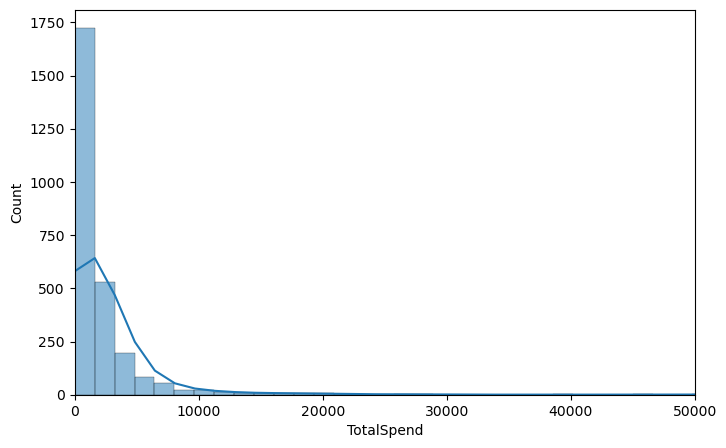

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data['TotalSpend'], bins=200, kde=True)
plt.xlim(0, 50000)

In [11]:
data['TotalSpend'].skew() # Extremely right skewness

19.232613228943002

<Axes: >

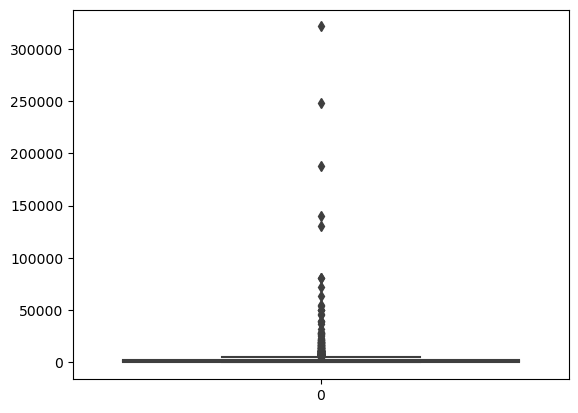

In [12]:
sns.boxplot(data['TotalSpend'])

#### --> Lets go for log transformation

In [13]:
dataCpy=data.copy()

In [14]:
dataCpy['Log_TotalSpend']=np.log1p(dataCpy['TotalSpend'])

<Axes: xlabel='Log_TotalSpend', ylabel='Count'>

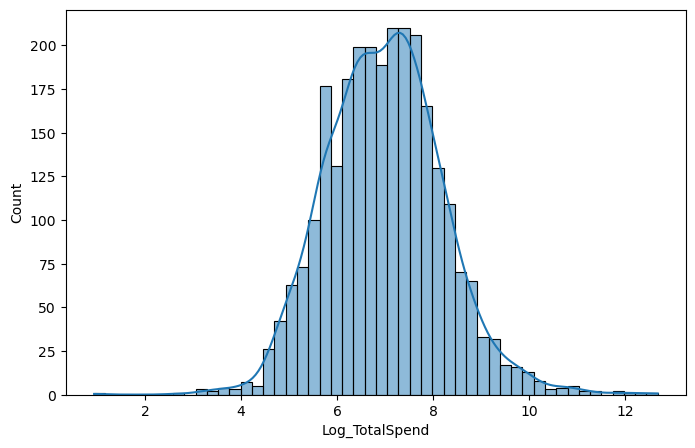

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(dataCpy['Log_TotalSpend'], bins=50, kde=True)

In [16]:
dataCpy['Log_TotalSpend'].skew()

0.2515263635180606

In [17]:
dataCpy['Log_TotalSpend'].describe()

count    2711.000000
mean        6.988966
std         1.212622
min         0.936093
25%         6.166247
50%         6.976040
75%         7.748264
max        12.680226
Name: Log_TotalSpend, dtype: float64

#### Purchase Frequency

In [18]:
data['PurchaseFrequency'].describe()

count    2711.000000
mean        5.584286
std         9.118702
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       180.000000
Name: PurchaseFrequency, dtype: float64

In [19]:
data['PurchaseFrequency'].value_counts().sort_index()

PurchaseFrequency
1      556
2      473
3      374
4      295
5      205
6      161
7      125
8       88
9       81
10      66
11      31
12      46
13      30
14      23
15      18
16      12
17      19
18      14
19       4
20       7
21       6
22       5
23       7
24       8
25       5
26       3
27       2
28       3
29       3
30       1
31       3
32       2
34       1
35       1
36       1
37       3
38       1
39       2
42       2
43       1
44       2
46       1
47       2
53       1
58       2
61       1
67       1
72       1
78       1
79       1
85       1
87       1
93       1
96       1
98       1
106      1
116      1
119      1
121      1
180      1
Name: count, dtype: int64

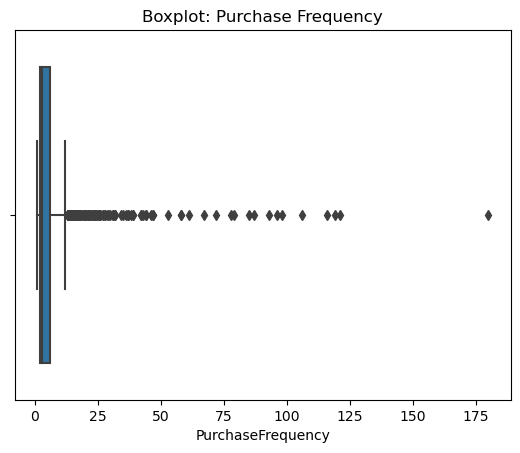

In [20]:
sns.boxplot(x=data['PurchaseFrequency'])
plt.title("Boxplot: Purchase Frequency")
plt.show()

In [21]:
dataCpy['PurchaseFrequency'].skew() #again right skewed

8.27063771300593

In [22]:
dataCpy['Log_PurchaseFrequency'] = np.log1p(dataCpy['PurchaseFrequency'])

<Axes: xlabel='Log_PurchaseFrequency', ylabel='Count'>

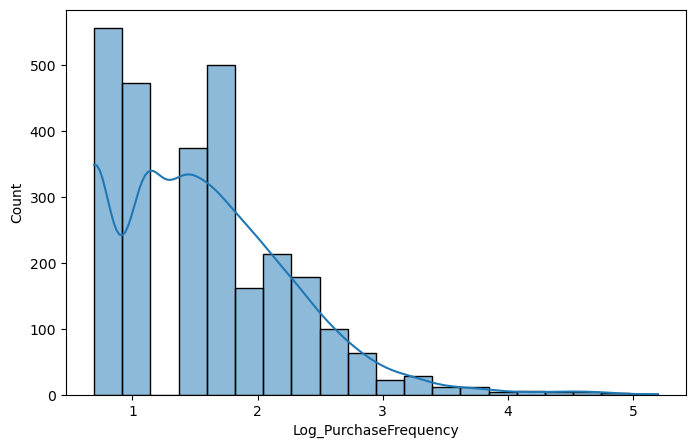

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(dataCpy['Log_PurchaseFrequency'], bins=20, kde=True)

In [24]:
dataCpy['Log_PurchaseFrequency'].skew() 
#Nope skewness even increased!!

0.9293917371161354

In [25]:
from scipy.stats import boxcox
dataCpy['BC_PurchaseFrequency'], _ = boxcox(dataCpy['PurchaseFrequency'] + 1)

In [26]:
dataCpy['BC_PurchaseFrequency'].skew() #skewness Reduced

0.08352271061520317

<Axes: xlabel='BC_PurchaseFrequency', ylabel='Count'>

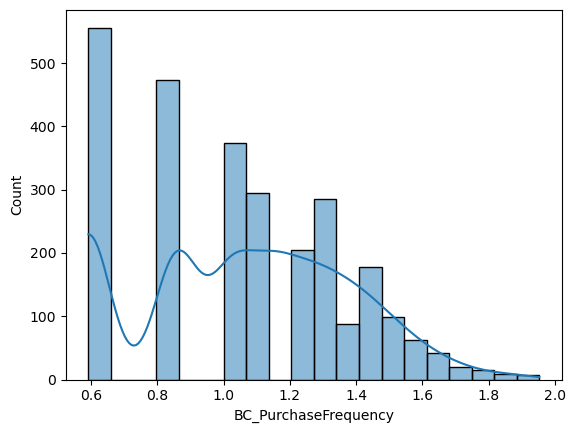

In [27]:
sns.histplot(dataCpy['BC_PurchaseFrequency'], bins=20, kde=True) 
#But distribution shows underlying groups
#Binning would be good i guess

In [28]:
#Lets try binning then hopefully it works!!
dataCpy['PurchaseFreq_Label'] = pd.cut(
    dataCpy['PurchaseFrequency'],
    bins=[0, 2, 5, 10, 30, np.inf],
    labels=['Rare', 'Low', 'Moderate', 'High', 'SuperBuyer']
)

In [29]:
dataCpy['PurchaseFreq_Label'].value_counts()

PurchaseFreq_Label
Rare          1029
Low            874
Moderate       521
High           247
SuperBuyer      40
Name: count, dtype: int64

In [30]:
# "Does SuperBuyers have higher CLV"
dataCpy.groupby('PurchaseFreq_Label')['CLV'].mean()
# Perfect trend can be seen...

PurchaseFreq_Label
Rare            897.700603
Low            1786.114154
Moderate       2395.544664
High           5995.985267
SuperBuyer    41058.836250
Name: CLV, dtype: float64

<Axes: title={'center': 'Avg CLV per Purchase Frequency Segment'}, xlabel='PurchaseFreq_Label'>

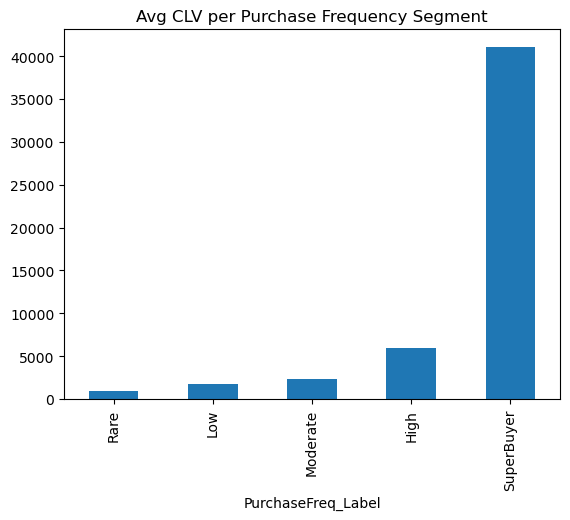

In [31]:
dataCpy.groupby('PurchaseFreq_Label')['CLV'].mean().plot(kind='bar', title='Avg CLV per Purchase Frequency Segment')

In [32]:
#Finally will Consider creating an additional binary feature for modeling:
dataCpy['IsFrequentBuyer'] = dataCpy['PurchaseFreq_Label'].isin(['High', 'SuperBuyer']).astype(int)

In [33]:
dataCpy['IsFrequentBuyer'].value_counts()

IsFrequentBuyer
0    2424
1     287
Name: count, dtype: int64

In [34]:
dataCpy.groupby('IsFrequentBuyer')['CLV'].mean()

IsFrequentBuyer
0     1539.965537
1    10882.793767
Name: CLV, dtype: float64

#### OrderHabit

In [35]:
data['OrderHabit'].describe()

count     2711.000000
mean       250.347466
std        489.597370
min          1.000000
25%        103.416667
50%        173.000000
75%        281.928571
max      17565.800000
Name: OrderHabit, dtype: float64

In [36]:
data['OrderHabit'].skew() #Higly right skewed

23.21055004680602

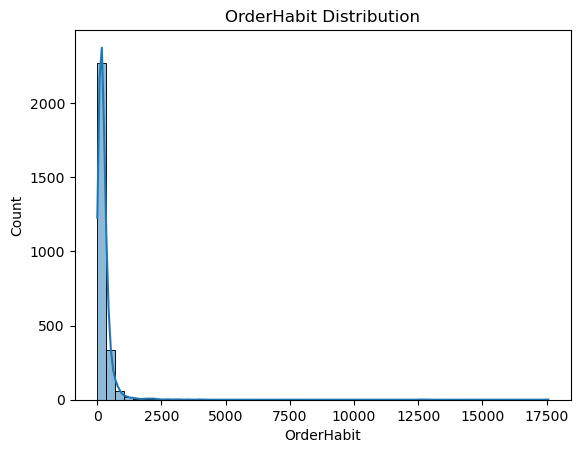

In [37]:
sns.histplot(data['OrderHabit'], kde=True, bins=50)
plt.title("OrderHabit Distribution")
plt.show()

In [38]:
dataCpy['Log_OrderHabit'] = np.log1p(dataCpy['OrderHabit'])

In [39]:
dataCpy['Log_OrderHabit'].skew() # which is almost symmetric(bit left skewed, but acceptable)

-0.29699149424381144

<Axes: xlabel='Log_OrderHabit', ylabel='Count'>

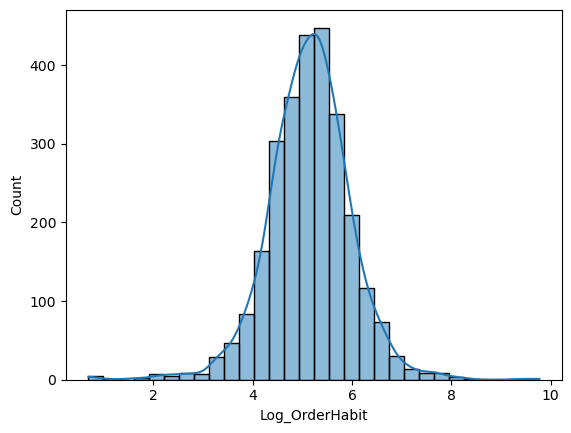

In [40]:
sns.histplot(dataCpy['Log_OrderHabit'], kde=True, bins=30)

In [41]:
dataCpy['OrderHabit_Label'] = pd.qcut(dataCpy['Log_OrderHabit'], q=5, labels=[
    'Light Buyer', 'Moderate Buyer', 'Regular Buyer', 'Heavy Buyer', 'Bulk Buyer'
])

In [42]:
dataCpy['OrderHabit_Label'].value_counts()

OrderHabit_Label
Light Buyer       548
Regular Buyer     545
Bulk Buyer        541
Heavy Buyer       540
Moderate Buyer    537
Name: count, dtype: int64

In [43]:
# “Do bulk buyers have higher CLV?”
dataCpy.groupby('OrderHabit_Label')['CLV'].mean() 
#This show that yes, BulkBuyers do have higher CLV

OrderHabit_Label
Light Buyer        905.737573
Moderate Buyer    1264.217412
Regular Buyer     1682.592697
Heavy Buyer       2314.359837
Bulk Buyer        6495.826250
Name: CLV, dtype: float64

In [44]:
# “Are light buyers more likely to churn?”
dataCpy.groupby('OrderHabit_Label')['Churn'].mean().sort_values()
#Inverse correlation: as order volume increases → churn decreases.

OrderHabit_Label
Bulk Buyer        0.118299
Heavy Buyer       0.124074
Moderate Buyer    0.147114
Regular Buyer     0.165138
Light Buyer       0.237226
Name: Churn, dtype: float64

In [45]:
# “Is CLV growth rate higher in moderate or heavy buyers?”
dataCpy.groupby(['OrderHabit_Label', 'Trend'])['CLV'].mean().unstack()
#Across all categories, customers with Increasing trend have much higher CLV.

Trend,Decreasing,Flag,Increasing,Stable
OrderHabit_Label,,,,
Light Buyer,660.845628,625.420000,1183.814179,310.607500
Moderate Buyer,1128.614845,861.893908,1471.313509,717.160000
Regular Buyer,1325.389211,927.119041,2036.964353,718.823333
Heavy Buyer,2381.572506,873.740303,2592.324954,1324.160000
Bulk Buyer,6969.069698,2837.193974,7178.451471,3506.540000


#### Recency

In [46]:
data['Recency'].describe()

count    2711.000000
mean       61.011435
std        74.803182
min         0.000000
25%        11.000000
50%        33.000000
75%        74.000000
max       364.000000
Name: Recency, dtype: float64

In [47]:
data['Recency'].skew() #Right skewed

1.8817039949920644

<Axes: xlabel='Recency', ylabel='Count'>

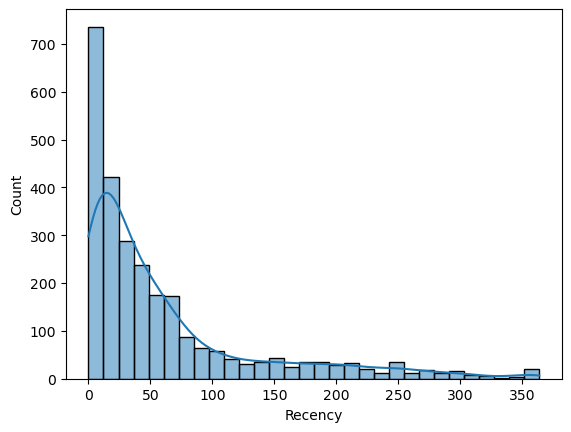

In [48]:
sns.histplot(data['Recency'], bins=30, kde=True)

In [49]:
#Again Log transformation
dataCpy['Log_Recency'] = np.log1p(dataCpy['Recency'])

<Axes: xlabel='Log_Recency', ylabel='Count'>

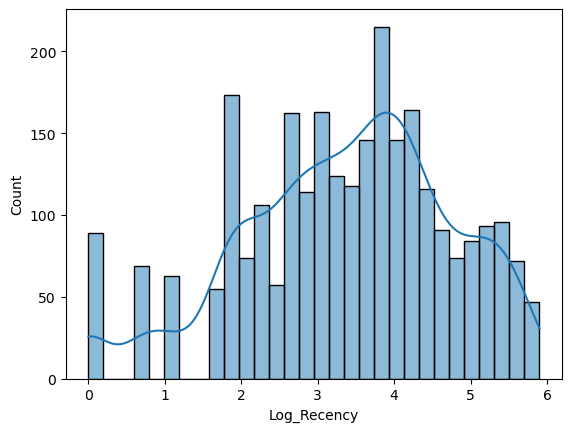

In [50]:
sns.histplot(dataCpy['Log_Recency'], bins=30, kde=True)

In [51]:
dataCpy['Log_Recency'].skew()

-0.42036223557471997

In [52]:
dataCpy['BC_Recency'], _ = boxcox(dataCpy['Recency'] + 1)

<Axes: xlabel='BC_Recency', ylabel='Count'>

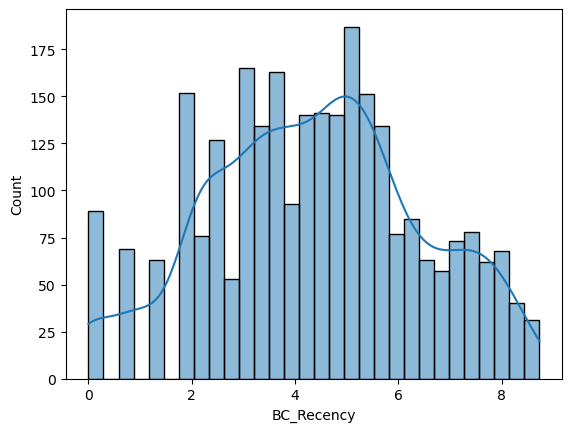

In [53]:
sns.histplot(dataCpy['BC_Recency'], bins=30, kde=True)

In [54]:
dataCpy['BC_Recency'].skew()

-0.03154952373646557

In [55]:
#Lets do Binning
#what i am thinking at this point is there no harm  in creating binning,
#will try tree based models as well in the end
bins =  [0, 50, 100, 200, 300, data['Recency'].max() + 1]
labels = ['Very Recent', 'Recent', 'Mid Term', 'Old', 'Dormant']
dataCpy['Recency_Label'] = pd.cut(dataCpy['Recency'], bins=bins, labels=labels)

In [56]:
dataCpy['Recency_Label'].value_counts() 
# Manual Binning-->Highy skewed...
#Since i dont have domain knowledge its better rather go for qcut()..

Recency_Label
Very Recent    1639
Recent          471
Mid Term        292
Old             178
Dormant          42
Name: count, dtype: int64

In [57]:
# Quantile binning into 5 equal-frequency groups
dataCpy['Recency_QBin'] = pd.qcut(dataCpy['Recency'], q=5,labels=['Very Recent', 'Recent', 'Mid Term', 'Old', 'Dormant'])
print(dataCpy['Recency_QBin'].value_counts())

Recency_QBin
Very Recent    576
Mid Term       545
Dormant        538
Old            537
Recent         515
Name: count, dtype: int64


In [58]:
dataCpy.groupby('Recency_Label')['CLV'].mean()

Recency_Label
Very Recent    3087.527841
Recent         1374.579132
Mid Term       1176.084490
Old             674.592079
Dormant         724.437857
Name: CLV, dtype: float64

In [59]:
dataCpy.groupby('Recency_QBin')['CLV'].mean() 

Recency_QBin
Very Recent    5060.804116
Recent         2647.425379
Mid Term       2407.770312
Old            1376.618102
Dormant         978.275634
Name: CLV, dtype: float64

In [60]:
#Qbin shows a good relation, but sadly we loose granularity
#will keep it and try with tree based model
#But we are keeping log form as well, let the model decide which one is good

#### Average Purchase gap

In [61]:
dataCpy[['AvgPurchaseGap', 'PurchaseFrequency']].corr()

,AvgPurchaseGap,PurchaseFrequency
AvgPurchaseGap,1.000000,-0.040707
PurchaseFrequency,-0.040707,1.000000


In [62]:
dataCpy['AvgPurchaseGap'].skew()

16.0643694832016

In [63]:
dataCpy['AvgPurchaseGap'].describe()

count    2711.000000
mean        3.534386
std        11.849225
min         0.000000
25%         0.291819
50%         1.450000
75%         3.279580
max       363.000000
Name: AvgPurchaseGap, dtype: float64

<Axes: xlabel='AvgPurchaseGap', ylabel='Count'>

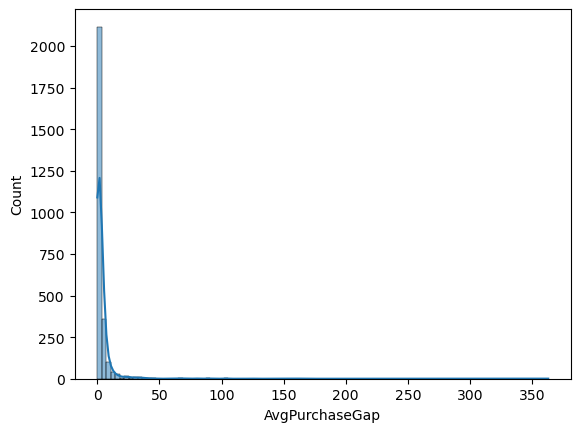

In [64]:
sns.histplot(data['AvgPurchaseGap'], bins=100 , kde=True)

In [65]:
dataCpy['Log_AvgPurchaseGap'] = np.log1p(dataCpy['AvgPurchaseGap'])

<Axes: xlabel='Log_AvgPurchaseGap', ylabel='Count'>

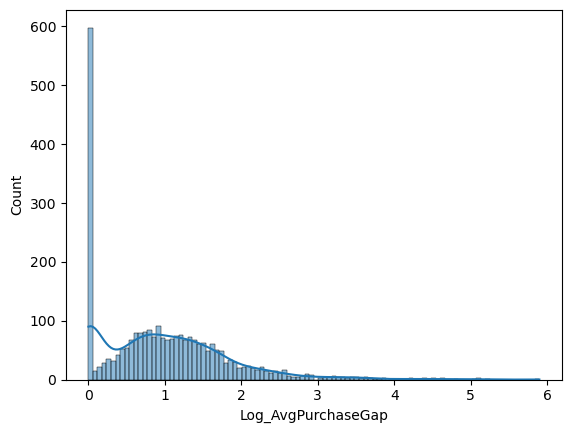

In [66]:
sns.histplot(dataCpy['Log_AvgPurchaseGap'], bins=100 , kde=True)

In [67]:
dataCpy['Log_AvgPurchaseGap'].skew()

1.0981047188351671

In [68]:
#For better insights lets try:
def gap_bin(gap):
    if gap == 0:
        return "Single Purchase"
    elif gap <= 1:
        return "Frequent"
    elif gap <= 3:
        return "Moderate"
    elif gap <= 15:
        return "Occasional"
    else:
        return "Rare"

dataCpy['Gap_Label'] = dataCpy['AvgPurchaseGap'].apply(gap_bin)

In [69]:
dataCpy.groupby('Gap_Label')['CLV'].mean()

Gap_Label
Frequent           6512.775281
Moderate           2229.720739
Occasional         1691.423547
Rare               1028.600560
Single Purchase     764.392779
Name: CLV, dtype: float64

In [70]:
dataCpy['Gap_Label'].value_counts()

Gap_Label
Moderate           881
Occasional         654
Single Purchase    587
Frequent           498
Rare                91
Name: count, dtype: int64

In [71]:
dataCpy.groupby('Gap_Label')['Churn'].value_counts()

Gap_Label        Churn
Frequent         0        453
                 1         45
Moderate         0        802
                 1         79
Occasional       0        587
                 1         67
Rare             0         79
                 1         12
Single Purchase  0        360
                 1        227
Name: count, dtype: int64

In [72]:
pd.crosstab(dataCpy['Gap_Label'], dataCpy['Churn'])
#Single purchase customers churn the most → Very likely one-time buyers.

Churn,0,1
Gap_Label,,
Frequent,453,45
Moderate,802,79
Occasional,587,67
Rare,79,12
Single Purchase,360,227


#### Trend and Churn

In [73]:
dataCpy['Trend'].value_counts()

Trend
Increasing    1508
Decreasing     793
Flag           393
Stable          17
Name: count, dtype: int64

In [74]:
dataCpy.groupby('Trend')['Churn'].mean()

Trend
Decreasing    0.436318
Flag          0.000000
Increasing    0.054377
Stable        0.117647
Name: Churn, dtype: float64

In [75]:
dataCpy['Churn'].value_counts()

Churn
0    2281
1     430
Name: count, dtype: int64

In [76]:
dataCpy.groupby('Churn')['CLV'].mean()

Churn
0    2827.313741
1     946.827047
Name: CLV, dtype: float64

#### Churn Labeling – Critical Observation

The current churn logic might be overly simplistic and not fully representative of actual customer behavior.

##### Logic Used (PseudoChurn):
> Customers who were inactive in the last 2 quarters (Q5 and Q6) are labeled as churned.

##### Why This Might Be Inaccurate:
- Misses **seasonal buyers** who tend to purchase only during specific times of the year.
- May falsely classify **high-value, one-time buyers** as churned.
---

#### Plan of Action:
- **Rename** the existing churn label to `PseudoChurn`.
- **Engineer a more reliable `Churn` label** that incorporates multiple behavioral factors to improve prediction quality.

In [77]:
dataCpy.rename(columns={'Churn': 'PseudoChurn'}, inplace=True)

In [78]:
median_clv = dataCpy['CLV'].median()

In [79]:
def refined_churn(row):
    purchase_count = row['PurchaseFrequency']
    recent_inactive = row['PseudoChurn'] == 1 #Inactive in last 2 quarters
    low_clv = row['CLV'] < median_clv
    
    return int((purchase_count >= 2) and recent_inactive and low_clv)

dataCpy['Churn'] = dataCpy.apply(refined_churn, axis=1)

In [80]:
dataCpy['Churn'].value_counts()

Churn
0    2561
1     150
Name: count, dtype: int64

In [81]:
dataCpy.groupby('Churn')['CLV'].mean()
#Churned customers contribute significantly less revenue

Churn
0    2656.731938
1     348.985200
Name: CLV, dtype: float64

In [82]:
dataCpy.groupby('Trend')['Churn'].mean()
#Now, this is strong

Trend
Decreasing    0.165195
Flag          0.000000
Increasing    0.012599
Stable        0.000000
Name: Churn, dtype: float64

#### Verdict: The New Churn Is Trustworthy
---

#### Trend

In [83]:
dataCpy['Trend'].value_counts()

Trend
Increasing    1508
Decreasing     793
Flag           393
Stable          17
Name: count, dtype: int64

In [84]:
pd.crosstab(dataCpy['Trend'], dataCpy['Churn'])

Churn,0,1
Trend,,
Decreasing,662,131
Flag,393,0
Increasing,1489,19
Stable,17,0


In [85]:
dataCpy.groupby('Trend')['CLV'].mean()

Trend
Decreasing    2273.915602
Flag          1214.490662
Increasing    3026.119165
Stable         725.921765
Name: CLV, dtype: float64

In [87]:
flag_df = dataCpy[dataCpy['Trend'] == 'Flag'].copy()

In [88]:
flag_df['TotalSpend'].describe()

count      393.000000
mean       670.193053
std       1247.833551
min         21.000000
25%        232.270000
50%        372.220000
75%        681.650000
max      13544.990000
Name: TotalSpend, dtype: float64

In [89]:
dataCpy['Trend_Refined'] = dataCpy['Trend']

In [90]:
def classify_flag(s):
    return 'New Buyer' if s <= 600 else 'Seasonal Buyer'

mask = dataCpy['Trend'] == 'Flag'
dataCpy.loc[mask, 'Trend_Refined'] = dataCpy.loc[mask, 'TotalSpend'].apply(classify_flag)

In [91]:
dataCpy['Trend_Refined'].value_counts()

Trend_Refined
Increasing        1508
Decreasing         793
New Buyer          274
Seasonal Buyer     119
Stable              17
Name: count, dtype: int64

In [92]:
dataCpy.groupby('Trend_Refined')['CLV'].mean()

Trend_Refined
Decreasing        2273.915602
Increasing        3026.119165
New Buyer          647.087701
Seasonal Buyer    2520.947899
Stable             725.921765
Name: CLV, dtype: float64

In [93]:
#New Buyers: Low CLV, aligns with typical behavior of first-time buyers.
#Seasonal Buyers: As expected! High spenders who buy in specific periods. Likely to return annually.

#### Return Rate

In [94]:
dataCpy['ReturnRate'].describe()

count    2711.000000
mean        0.015244
std         0.051414
min         0.000000
25%         0.000000
50%         0.000000
75%         0.009980
max         0.750000
Name: ReturnRate, dtype: float64

In [95]:
dataCpy['ReturnRate'].skew() #Skewed

7.384099304825433

<Axes: xlabel='ReturnRate', ylabel='Count'>

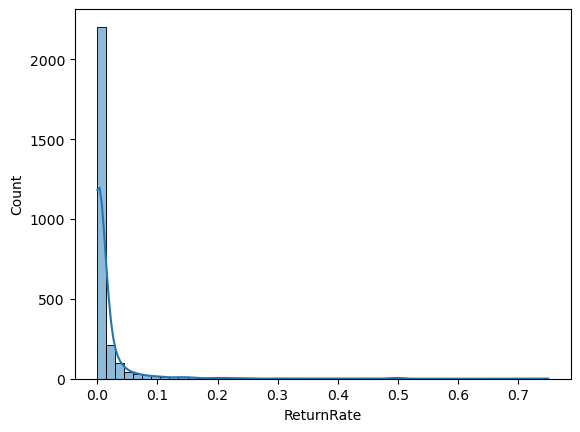

In [96]:
sns.histplot(dataCpy['ReturnRate'], bins=50, kde=True)

In [97]:
def return_rate_label(rr):
    if rr == 0:
        return "No Return"
    elif rr <= 0.05:
        return "Occasional Returner"
    elif rr <= 0.2:
        return "Frequent Returner"
    else:
        return "High Returner"
        
dataCpy['Return_Label'] = dataCpy['ReturnRate'].apply(return_rate_label)

In [98]:
dataCpy['Return_Label'].value_counts()

Return_Label
No Return              1374
Occasional Returner    1160
Frequent Returner       137
High Returner            40
Name: count, dtype: int64

In [99]:
dataCpy.groupby('Return_Label')['CLV'].mean()

Return_Label
Frequent Returner      3586.259854
High Returner          4359.270250
No Return              1198.507133
Occasional Returner    3917.069881
Name: CLV, dtype: float64

In [100]:
dataCpy.groupby('Return_Label')['PurchaseFrequency'].mean()

Return_Label
Frequent Returner      6.321168
High Returner          5.700000
No Return              2.933042
Occasional Returner    8.633621
Name: PurchaseFrequency, dtype: float64

In [101]:
dataCpy.groupby('Return_Label')['Churn'].mean()

Return_Label
Frequent Returner      0.072993
High Returner          0.150000
No Return              0.064047
Occasional Returner    0.039655
Name: Churn, dtype: float64

In [102]:
dataCpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   TotalSpend             2711 non-null   float64 
 1   PurchaseFrequency      2711 non-null   int64   
 2   OrderHabit             2711 non-null   float64 
 3   Recency                2711 non-null   int64   
 4   AvgPurchaseGap         2711 non-null   float64 
 5   Trend                  2711 non-null   object  
 6   PseudoChurn            2711 non-null   int64   
 7   ReturnRate             2711 non-null   float64 
 8   CLV                    2711 non-null   float64 
 9   Log_TotalSpend         2711 non-null   float64 
 10  Log_PurchaseFrequency  2711 non-null   float64 
 11  BC_PurchaseFrequency   2711 non-null   float64 
 12  PurchaseFreq_Label     2711 non-null   category
 13  IsFrequentBuyer        2711 non-null   int32   
 14  Log_OrderHabit         2711 non-null   f

In [103]:
dataCpy.head()

,TotalSpend,PurchaseFrequency,OrderHabit,Recency,AvgPurchaseGap,Trend,PseudoChurn,ReturnRate,CLV,Log_TotalSpend,...,OrderHabit_Label,Log_Recency,BC_Recency,Recency_Label,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Churn,Trend_Refined,Return_Label
0,169.36,2,12.0,155,5.130435,Increasing,1,0.428571,77183.60,5.137914,...,Light Buyer,5.049856,7.041233,Mid Term,Dormant,1.813266,Occasional,0,Increasing,High Returner
1,611.53,1,509.0,30,0.000000,Flag,0,0.000000,4085.18,6.417598,...,Bulk Buyer,3.433987,4.289556,Very Recent,Mid Term,0.000000,Single Purchase,0,Seasonal Buyer,No Return
2,222.16,1,373.0,64,0.000000,Increasing,0,0.000000,1797.24,5.407889,...,Bulk Buyer,4.174387,5.481602,Recent,Old,0.000000,Single Purchase,0,Increasing,No Return
3,2671.14,3,331.0,33,1.782178,Increasing,0,0.005010,1757.55,7.890635,...,Bulk Buyer,3.526361,4.432320,Very Recent,Mid Term,1.023234,Moderate,0,Increasing,Occasional Returner
4,343.80,2,94.0,1,0.941176,Flag,0,0.000000,1665.74,5.842965,...,Moderate Buyer,0.693147,0.724086,Very Recent,Very Recent,0.663294,Frequent,0,New Buyer,No Return


In [106]:
dataCpy['SpendPerOrder'] = dataCpy['TotalSpend'] / dataCpy['PurchaseFrequency']
dataCpy['SpendRate'] = dataCpy['TotalSpend'] / dataCpy['Recency']
dataCpy['GapPerOrder'] = dataCpy['AvgPurchaseGap'] / dataCpy['PurchaseFrequency']

In [108]:
dataCpy['Log_SpendRate'] = np.log1p(dataCpy['SpendRate'])

In [109]:
dataCpy

,TotalSpend,PurchaseFrequency,OrderHabit,Recency,AvgPurchaseGap,Trend,PseudoChurn,ReturnRate,CLV,Log_TotalSpend,...,Recency_QBin,Log_AvgPurchaseGap,Gap_Label,Churn,Trend_Refined,Return_Label,SpendPerOrder,SpendRate,GapPerOrder,Log_SpendRate
0,169.36,2,12.00,155,5.130435,Increasing,1,0.428571,77183.60,5.137914,...,Dormant,1.813266,Occasional,0,Increasing,High Returner,84.680000,1.092645,2.565217,0.738429
1,611.53,1,509.00,30,0.000000,Flag,0,0.000000,4085.18,6.417598,...,Mid Term,0.000000,Single Purchase,0,Seasonal Buyer,No Return,611.530000,20.384333,0.000000,3.062659
2,222.16,1,373.00,64,0.000000,Increasing,0,0.000000,1797.24,5.407889,...,Old,0.000000,Single Purchase,0,Increasing,No Return,222.160000,3.471250,0.000000,1.497668
3,2671.14,3,331.00,33,1.782178,Increasing,0,0.005010,1757.55,7.890635,...,Mid Term,1.023234,Moderate,0,Increasing,Occasional Returner,890.380000,80.943636,0.594059,4.406032
4,343.80,2,94.00,1,0.941176,Flag,0,0.000000,1665.74,5.842965,...,Very Recent,0.663294,Frequent,0,New Buyer,No Return,171.900000,343.800000,0.470588,5.842965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,240.30,1,74.00,30,0.000000,Flag,0,0.000000,173.90,5.486041,...,Mid Term,0.000000,Single Purchase,0,New Buyer,No Return,240.300000,8.010000,0.000000,2.198335
2707,307.55,1,149.00,20,0.000000,Flag,0,0.013245,180.60,5.731884,...,Recent,0.000000,Single Purchase,0,New Buyer,Occasional Returner,307.550000,15.377500,0.000000,2.795908
2708,120.32,1,92.00,203,0.000000,Decreasing,1,0.000000,80.82,4.798432,...,Dormant,0.000000,Single Purchase,0,Decreasing,No Return,120.320000,0.592709,0.000000,0.465437
2709,641.77,6,56.00,8,1.192140,Increasing,0,0.000000,1880.93,6.465787,...,Very Recent,0.784878,Moderate,0,Increasing,No Return,106.961667,80.221250,0.198690,4.397177


In [110]:
dataCpy.to_csv('dataCpy.csv', index=False)

In [111]:
final_cols = [
    'Log_TotalSpend',
    'SpendPerOrder',
    'SpendRate',
    'GapPerOrder',
    'Log_SpendRate',
    'PurchaseFreq_Label',
    'OrderHabit_Label', 
    'Log_OrderHabit', 
    'Recency_QBin',
    'Log_AvgPurchaseGap', 
    'Gap_Label', 
    'Trend_Refined',
    'Return_Label',
    'Log_Recency',
    'Churn',
    'CLV'
]

data_final = dataCpy[final_cols]
data_final.to_csv('model_data_final.csv', index=False)